# Part 1. Hypothesis Testing

## Libraries

For today's demo, we'll be using [Statsmodels](http://statsmodels.sourceforge.net/) for **teaching purposes**, since it has some nice characteristics for linear modeling. 

We will be demostrating *hypothesis testing* as it relates to linear modeling. We'll dive into how to do linear regression models in later classes. 

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

## Example: Advertising Data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [2]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Student Question- What are the **features**?

Answer:


In [12]:
data.columns  # spending on TV, Radio, Newspaper ads

Index([u'TV', u'Radio', u'Newspaper', u'Sales'], dtype='object')

### Student Question- What is the **outcome**?

Answer:

In [ ]:
units sold

In [6]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 **observations**, and thus 200 markets in the dataset.

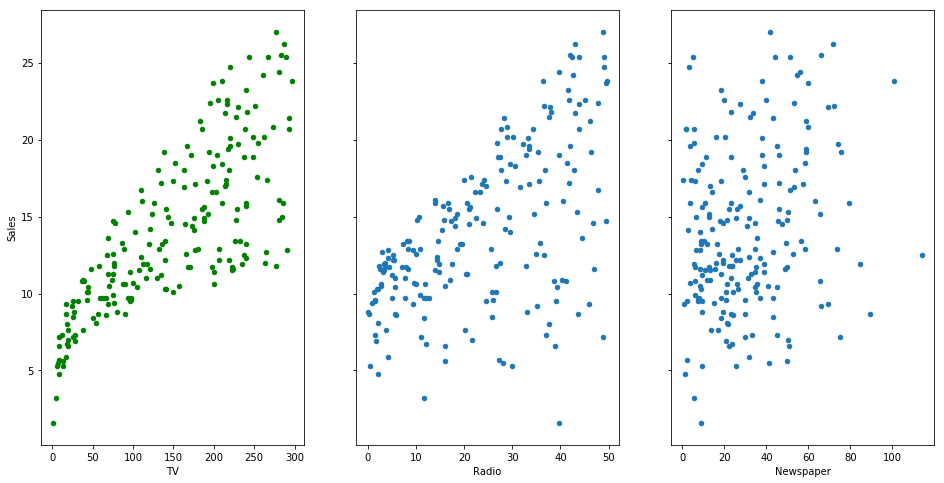

In [14]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8), color="green")
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this new device. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?
1. Is there a relationship between ads and sales?

In [ ]:
Based on TV data, looks like yes.

### Student Question- Is this a causal relationship? 

Answer: 

In [ ]:
The question is not a causal question as phrased. It's correlative.

### Student Question: What other questions might we want to know about this data?

Answer:


In [15]:
Is there a statistically significant difference between sales with various (or 2 different) advertising buys?

Object `buys` not found.


In [ ]:
How can we determine whether increase in units sold is due to TV spending vs news spending vs radio?

Let's use **Statsmodels** to estimate the association between advertising efforts and sales. 

In [56]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
#formula notification is the equivalent to writing out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm_tv = smf.ols(formula='Sales ~ TV', data=data).fit()
lm_r = smf.ols(formula='Sales ~ Radio', data=data).fit()
lm_n = smf.ols(formula='Sales ~ Newspaper', data=data).fit()
lm_n_r = smf.ols(formula='Sales ~ Newspaper+Radio', data=data).fit()
lm_tv_radio = smf.ols(formula='Sales ~ TV+Radio', data=data).fit()
lm_tv_radio_tvradio = smf.ols(formula='Sales ~ TV+Radio+TV*Radio', data=data).fit()
lm_tvr = smf.ols(formula='Sales ~ TV*Radio', data=data).fit()


#print the full summary
print '\n----TV----'
print lm_tv.summary()
print '\n----Radio----'
print lm_r.summary()
print '\n----Newspaper----'
print lm_n.summary()
print '\n----News+Radio----'
print lm_n_r.summary()
print '\n----TV + Radio----'
print lm_tv_radio.summary()
print '\n----TV + Radio + TV*Radio----'
print lm_tv_radio_tvradio.summary()
print '\n----TV*Radio----'
print lm_tvr.summary()



----TV----
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 23 Feb 2017   Prob (F-statistic):           1.47e-42
Time:                        21:17:49   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.

In [40]:
# print the coefficients
lm.params

Intercept    6.750220
TV           0.019101
Radio        0.028860
TV:Radio     0.001086
dtype: float64

## Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50000$$

In [10]:
# manually calculate the prediction
7.032594 + 0.047537*50000   #  WHERE DID B0 COME FROM?  TV-only

2383.882594

Thus, we would predict Sales of **2,383 widgets** in that market.

Of course, we can also use Statsmodels to make the prediction:

In [25]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50000], 'Radio': [50000], 'Newspaper':[50000]})
X_new.head()

,Newspaper,Radio,TV
0,50000,50000,50000


In [24]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([ 3228.63378152])

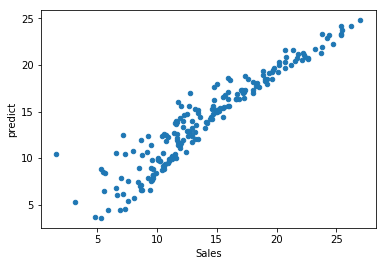

In [34]:
tv_radio_data = data.copy()
tv_radio_data['predict'] = lm_tv_radio.predict(data)
tv_radio_data[['predict', 'Sales']].plot.scatter(x='Sales', y='predict')

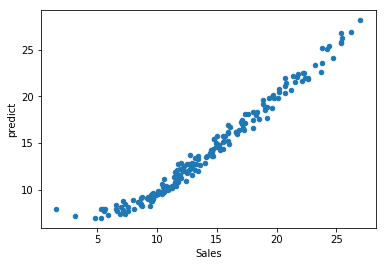

In [35]:
tv_r_tvr_data = data.copy()
tv_r_tvr_data['predict'] = lm_tv_radio_tvradio.predict(data)
tv_r_tvr_data[['predict', 'Sales']].plot.scatter(x='Sales', y='predict')

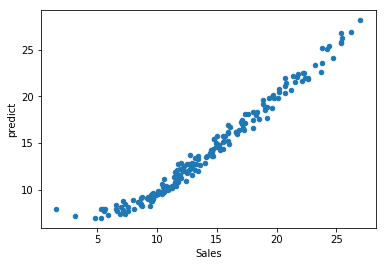

In [58]:
tvr_data = data.copy()
tvr_data['predict'] = lm_tvr.predict(data)
tvr_data[['predict', 'Sales']].plot.scatter(x='Sales', y='predict')

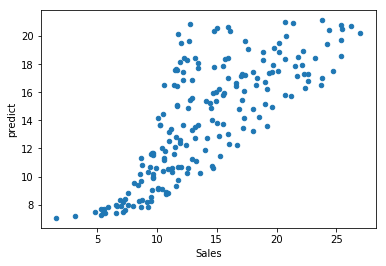

In [57]:
tv_data = data.copy()
tv_data['predict'] = lm_tv.predict(data)
tv_data[['predict', 'Sales']].plot.scatter(x='Sales', y='predict')

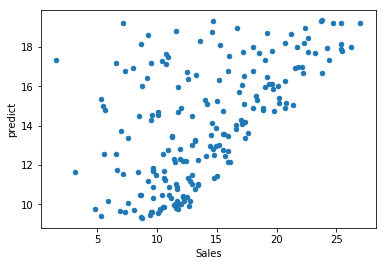

In [51]:
radio_data = data.copy()
radio_data['predict'] = lm_r.predict(data)
radio_data[['predict', 'Sales']].plot.scatter(x='Sales', y='predict')

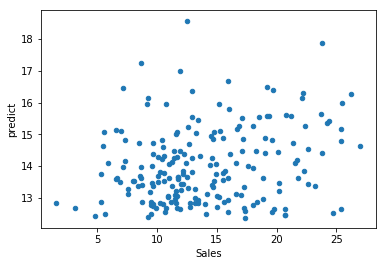

In [52]:
news_data = data.copy()
news_data['predict'] = lm_n.predict(data)
news_data[['predict', 'Sales']].plot.scatter(x='Sales', y='predict')

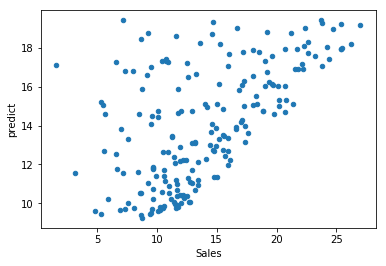

In [55]:
news_rad_data = data.copy()
news_rad_data['predict'] = lm_n_r.predict(data)
news_rad_data[['predict', 'Sales']].plot.scatter(x='Sales', y='predict')

In [67]:
# lm_tv_out = smf.ols(formula='TV ~ Radio', data=data).fit()


# #print the full summary
# print '\n----TV ~ Radio ----'
# print lm_tv_out.summary()
# copy_data = data.copy()
# copy_data['predict'] = lm_tv_out.predict(data)
# copy_data[['predict', 'TV']].plot.scatter(x='TV', y='predict')

lm_radio_out = smf.ols(formula='Radio ~ Radio', data=data).fit()
print lm_radio_out.summary()

                            OLS Regression Results                            
Dep. Variable:                  Radio   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.819e+32
Date:                Thu, 23 Feb 2017   Prob (F-statistic):               0.00
Time:                        21:22:48   Log-Likelihood:                 6173.9
No. Observations:                 200   AIC:                        -1.234e+04
Df Residuals:                     198   BIC:                        -1.234e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -3.553e-15   1.26e-15     -2.828      0.0

# Part 2. Confidence in our Model

**Question:** Is linear regression a high bias/low variance model, or a low bias/high variance model?

**Answer:** 

high bias/low variance

---

A closely related concept is **confidence intervals**. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

In [26]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
Radio,0.171547,0.205513
Newspaper,-0.012616,0.010541


Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

## Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** - a hypothesis that is the opposite of the null. Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

Note that "failing to reject" the null is ***not*** the same as "accepting" the null hypothesis. Your alternative hypothesis may indeed be true, but you don't necessarily have enough data to show that yet. 

As it relates to model coefficients, here is the conventional hypothesis test:

- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? We reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. 

Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [27]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. 

If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. Using 0.05 as the cutoff is a standard convention.

In this case, the p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

#### We'll come back to this later